# Primeiras Visualizações de Dados

> Dados das aulas disponíveis no [repositório do curso](https://github.com/alura-tech/pos-datascience-analise-e-exploracao-de-dados/archive/refs/heads/Dados.zip) no GitHub

* Referências
  * [DataSUS](https://datasus.saude.gov.br/)
  * [Documentação Pandas](https://pandas.pydata.org/)

## Anotações

### Citações do material da aula

```text
[...] Uma pesquisa conduzida pela SHIFT Disruptive Learning, mostrou que geralmente processamos imagens 60.000 vezes mais rápido do que uma tabela ou texto e que nossos cérebros fazem um trabalho melhor de lembrá-los no futuro. O estudo constatou que, após três dias, os estudos analisados retinham entre 10% e 20% das informações escritas ou faladas, em comparação com 65% das informações visuais.

Uma pesquisa conduzida pela SHIFT Disruptive Learning, mostrou que geralmente processamos imagens 60.000 vezes mais rápido do que uma tabela ou texto e que nossos cérebros fazem um trabalho melhor de lembrá-los no futuro. O estudo constatou que, após três dias, os estudos analisados retinham entre 10% e 20% das informações escritas ou faladas, em comparação com 65% das informações visuais. [...]
```

```text
[...] A visualização de dados nos ajuda a contar histórias, organizando os dados de uma forma mais fácil de entender, destacando as tendências e os valores discrepantes. Uma boa visualização conta uma história, removendo o ruído dos dados e destacando informações úteis. [...]
```

```text
[...] O gráfico mais simples pode ser muito complicado para chamar a atenção ou revelar um ponto importante; a visualização mais impressionante pode falhar totalmente em transmitir a mensagem certa ou pode falar muito. [...]
```


```text
[...] Edward Tufte, em seu livro de 1983, “The Visual Display of Quantitative Information”, explicou que os usuários de exibições de informações estão executando tarefas analíticas específicas, como fazer comparações. O princípio de design do infográfico deve apoiar a tarefa analítica. Segundo William Cleveland e Robert McGill, diferentes elementos gráficos realizam isso de forma mais ou menos eficaz. Por exemplo, gráficos de pontos e gráficos de barras superam os gráficos de setor (pizza).
```

```text
[...] "Excelência em gráficos estatísticos consiste em ideias complexas comunicadas com clareza, precisão e eficiência. [...] Gráficos revelam dados. Na verdade, os gráficos podem ser mais precisos e reveladores do que os cálculos estatísticos”.
```

### Minard's Diagram

![Minard Diagram](https://www.researchgate.net/profile/Chaomei-Chen/publication/254560667/figure/fig8/AS:297978439979014@1448055004477/Minards-map-Source.png)

* Mostra as perdas sofridas por Napoleão entre 1812 e 1813
* Seis variáveis plotadas:
  * Tamanho do exercíto
  * Localização em uma superfície bidimensional (x ; y)
  * Tempo
  * Direção de movimento
  * Temperatura
* Largura da linha indica uma comparação tamanho do exercíto vs tempo
* Eixo da temperatura sugere uuma mudança, também, no tamanho do exercíto
* Tufte denota que pode ser "o melhor gráfico estatístico já desenhado"

### Definições do Congressional Budget Office
1. Conheça o seu público
2. DEsenhar gráficos que possam estar isolados fora do contexto do relatório
3. Criaçãoo de gráficos que comuniquem as principais mensagens do relatório

In [42]:
from urllib.request import urlretrieve
from pathlib import Path
from zipfile import ZipFile

DATA_URL = 'https://github.com/alura-tech/pos-datascience-analise-e-exploracao-de-dados/archive/refs/heads/Dados.zip'
DATA_PATH_RAW = './data/raw'
DATA_PATH_EXTRACTED = './data/interim'

Path(DATA_PATH_RAW).mkdir(parents=True, exist_ok=True)
Path(DATA_PATH_EXTRACTED).mkdir(parents=True, exist_ok=True)

urlretrieve(DATA_URL, DATA_PATH_RAW + '/data.zip')

with ZipFile(DATA_PATH_RAW + '/data.zip') as zip_ref:
    zip_ref.extractall(DATA_PATH_EXTRACTED)

In [43]:
import pandas as pd

In [44]:
FILE_PATH = './data/interim/pos-datascience-analise-e-exploracao-de-dados-Dados/A150850189_28_143_208.csv'

df = pd.read_csv(FILE_PATH,
                 encoding='ISO-8859-1', # Latin One
                 skiprows=3,
                 sep=';',
                 skipfooter=12,
                 thousands='.',
                 decimal=',')

df.shape

/tmp/ipykernel_5193/3580337901.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(FILE_PATH,


(27, 293)

In [45]:
df['2008/Ago']

0     2.938286e+06
1     1.886872e+06
2     8.331764e+06
3     1.045291e+06
4     2.325915e+07
5     1.550341e+06
6     5.213290e+06
7     1.460987e+07
8     1.064592e+07
9     2.930482e+07
10    1.081284e+07
11    1.267377e+07
12    3.170530e+07
13    9.262768e+06
14    4.543252e+06
15    4.325454e+07
16    8.037412e+07
17    1.238407e+07
18    4.250217e+07
19    1.800974e+08
20    5.669900e+07
21    2.888785e+07
22    5.623376e+07
23    9.602843e+06
24    8.987812e+06
25    2.107020e+07
26    1.154845e+07
Name: 2008/Ago, dtype: float64

In [46]:
df['2008/Ago'].mean()

26645398.35703704

<Axes: xlabel='Unidade da Federação'>

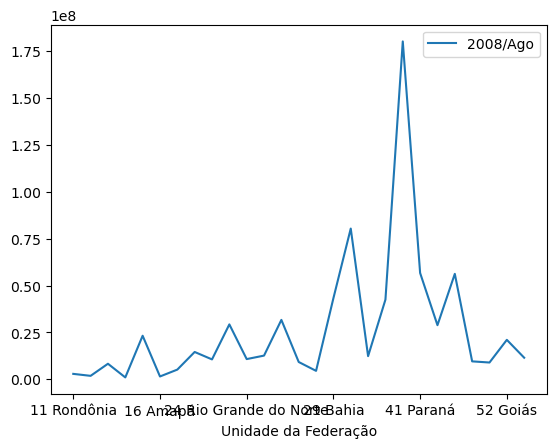

In [47]:
df.plot(x='Unidade da Federação',
        y='2008/Ago')

<Axes: xlabel='Unidade da Federação'>

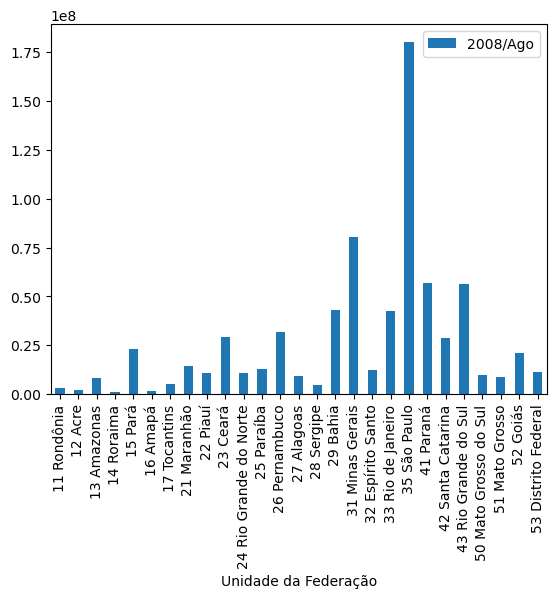

In [48]:
df.plot.bar(x='Unidade da Federação',
            y='2008/Ago')

<Axes: xlabel='Unidade da Federação'>

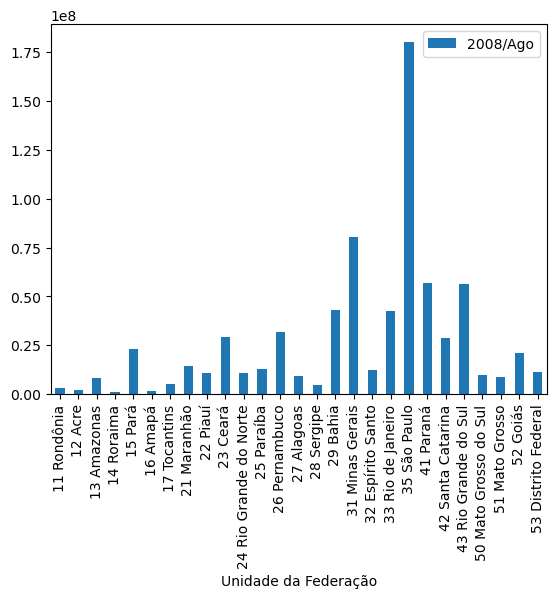

In [49]:
df.plot(x='Unidade da Federação',
        y='2008/Ago',
        kind='bar')

<Axes: xlabel='Unidade da Federação'>

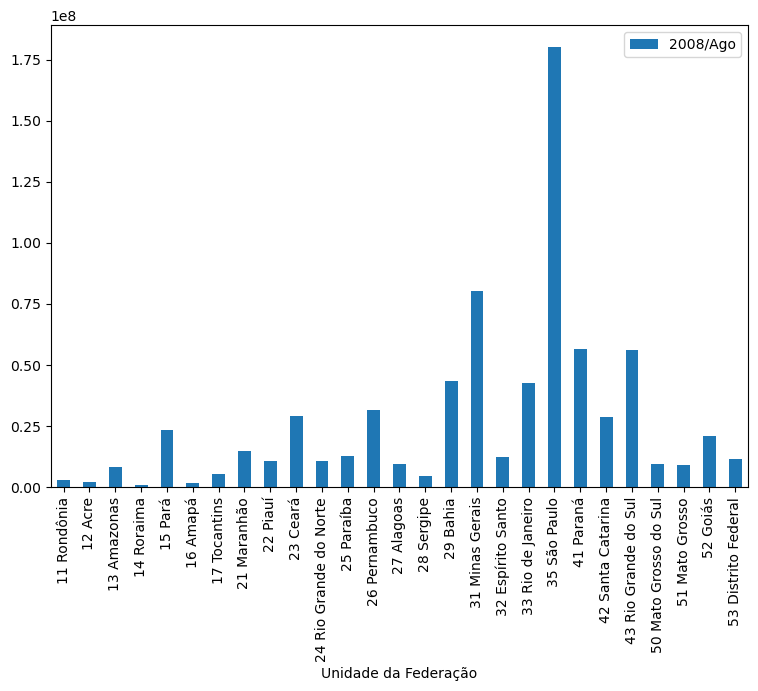

In [50]:
df.plot(x='Unidade da Federação',
        y='2008/Ago',
        kind='bar',
        figsize=(9, 6))

In [51]:
from matplotlib import ticker

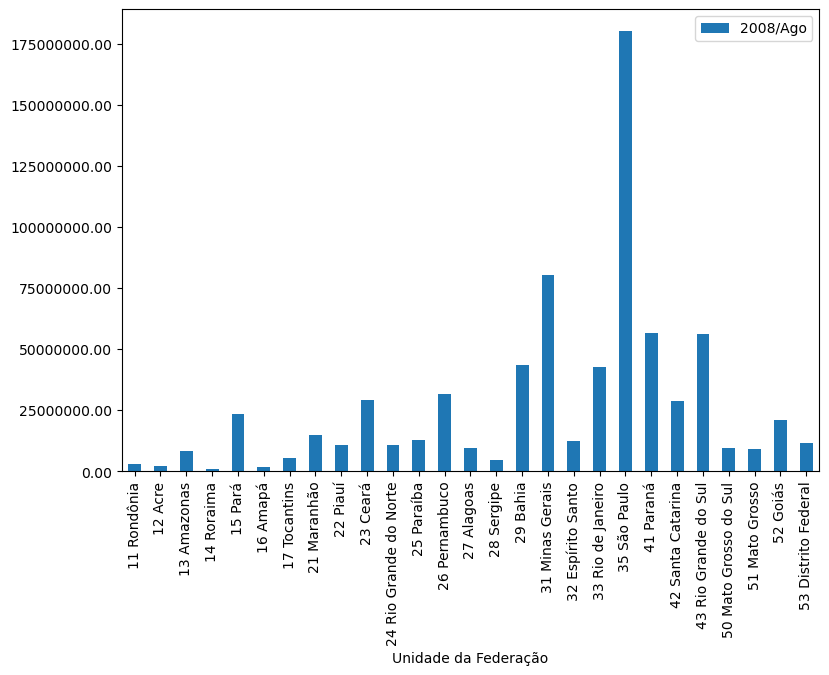

In [52]:
axis = df.plot(x='Unidade da Federação',
               y='2008/Ago',
               kind='bar',
               figsize=(9, 6))

axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

In [53]:
from matplotlib import pyplot as plt

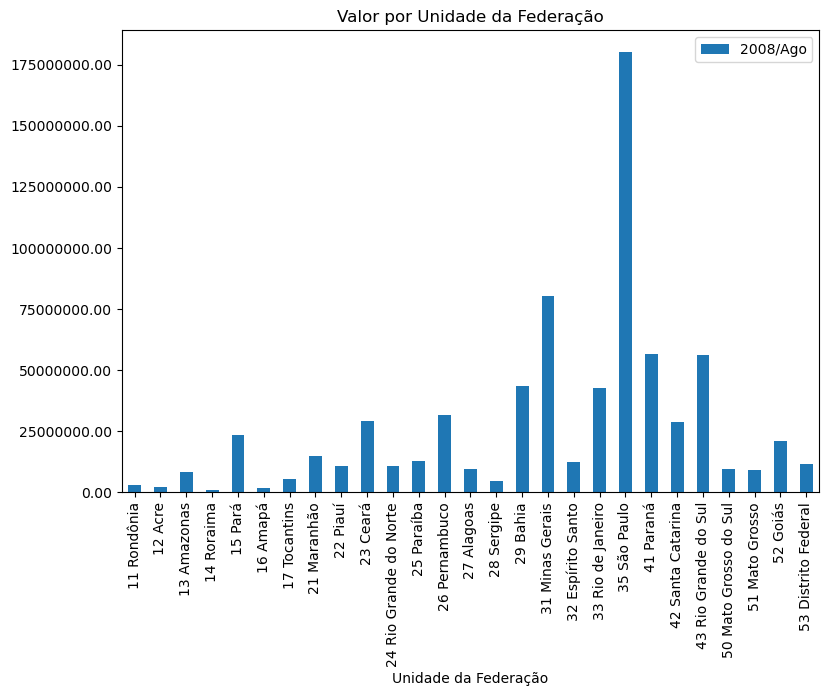

In [54]:
axis = df.plot(x='Unidade da Federação',
               y='2008/Ago',
               kind='bar',
               figsize=(9, 6))

axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

plt.title('Valor por Unidade da Federação')
plt.show()

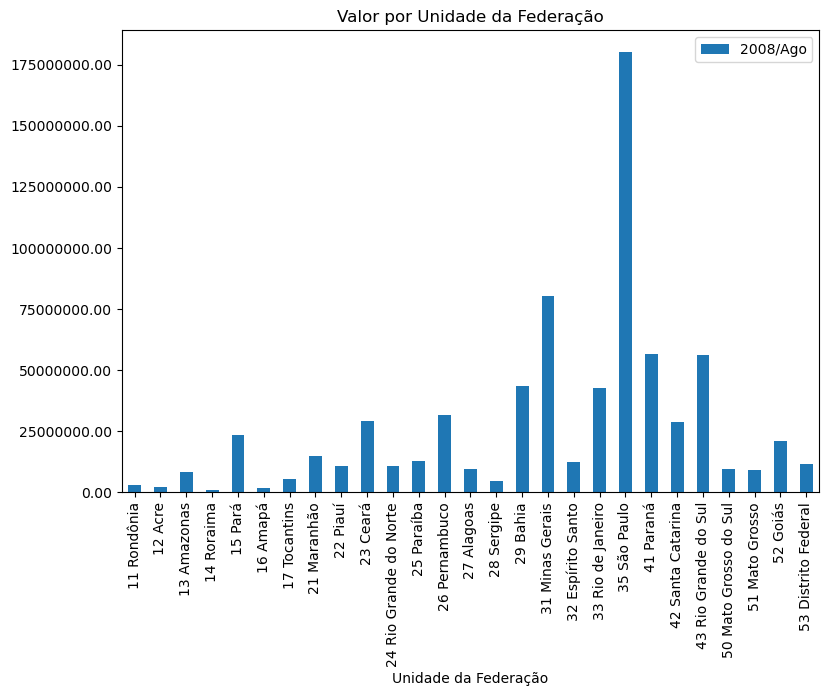

In [55]:
axis = df.plot(x='Unidade da Federação',
               y='2008/Ago',
               kind='bar',
               figsize=(9, 6))

axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

plt.title('Valor por Unidade da Federação');

## Desafio 1: Executar o mesmo gráfico anterior com o mês mais recente

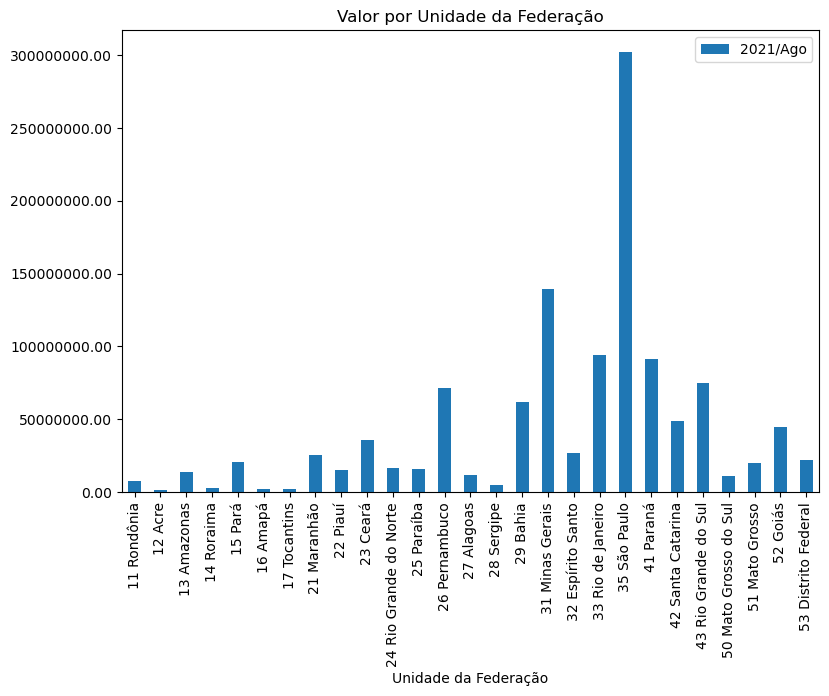

In [56]:
axis = df.plot(x='Unidade da Federação',
               y='2021/Ago',
               kind='bar',
               figsize=(9, 6),)

axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

plt.title('Valor por Unidade da Federação');

## Desafio 2: Mudar angulação de xticks para 45 graus de inclinação

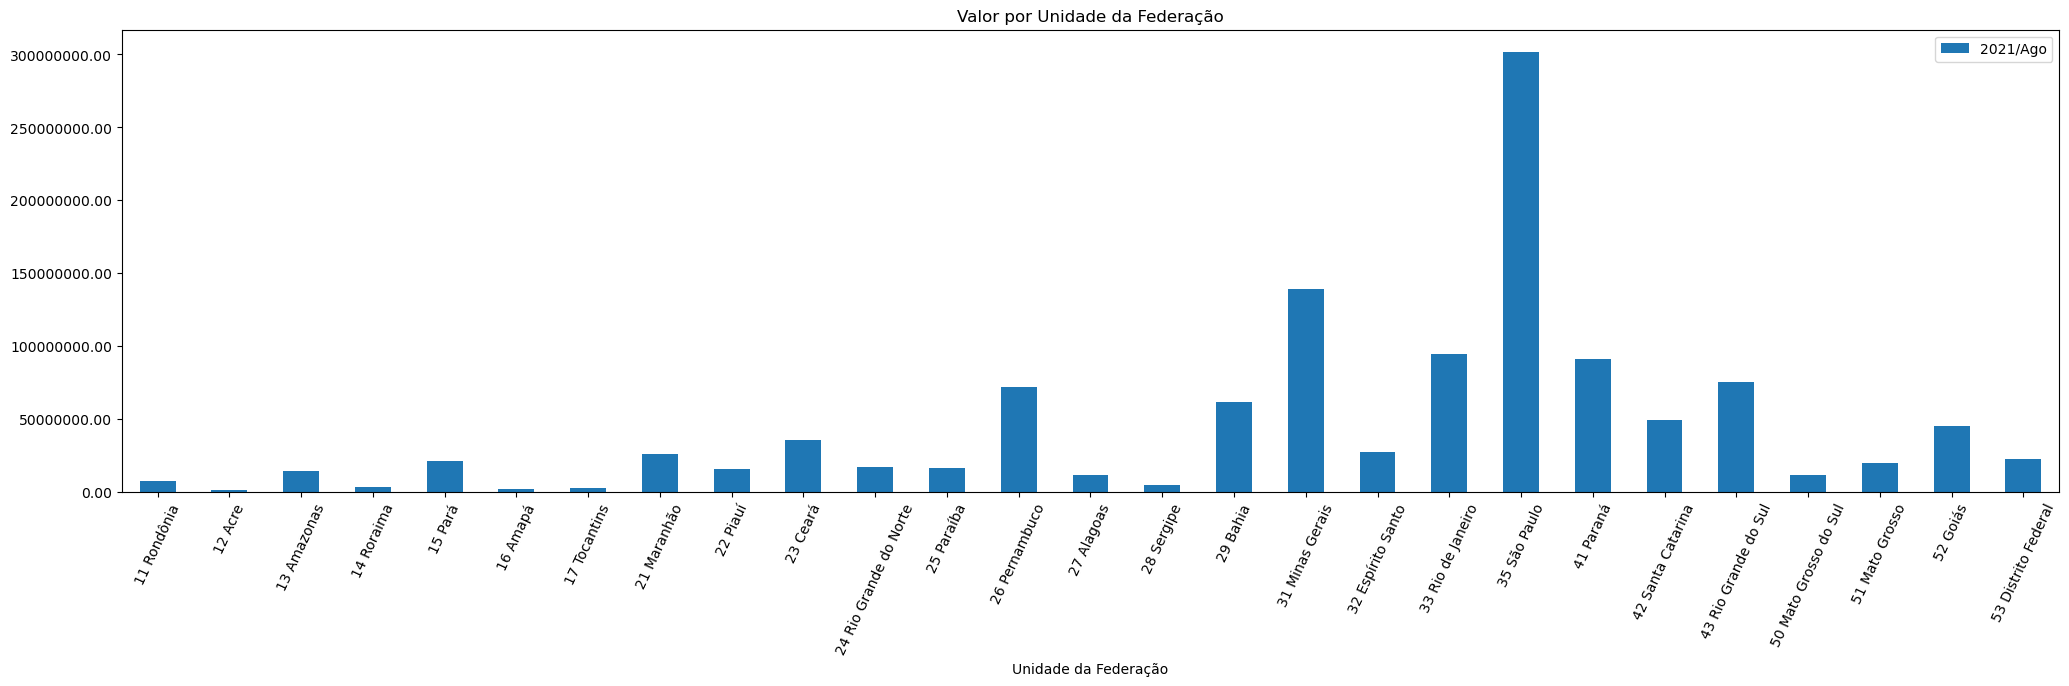

In [57]:
axis = df.plot(x='Unidade da Federação',
               y='2021/Ago',
               kind='bar',
               figsize=(25, 6))

axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

plt.title('Valor por Unidade da Federação')
plt.xticks(rotation=65);